# Regression Examples:With Bikes

- Bikes is everywhere
- The problem can be introduced in Bucaramanga
- The aplication can be introduced in UIS
- Which variable we need to predict number of bikes?



In [1]:
import matplotlib as mpl

%matplotlib inline

In [2]:
import pandas as pd
bikes = pd.read_csv('../data/bikes.csv')
bikes.head()

,date,temperature,humidity,windspeed,count
0,2011-01-03,2.716070,45.715346,21.414957,120.0
1,2011-01-04,2.896673,54.267219,15.136882,108.0
2,2011-01-05,4.235654,45.697702,17.034578,82.0
3,2011-01-06,3.112643,50.237349,10.091568,88.0
4,2011-01-07,2.723918,49.144928,15.738204,148.0


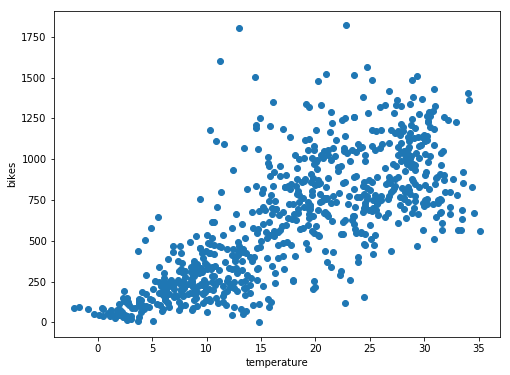

In [3]:
from matplotlib import pyplot as plt

plt.figure(figsize=(8,6))
plt.plot(bikes['temperature'], bikes['count'], 'o')
plt.xlabel('temperature')
plt.ylabel('bikes')
plt.show()

In [20]:
from sklearn.tree import DecisionTreeRegressor
import numpy as np

regressor = DecisionTreeRegressor(max_depth=2)
regressorSA = DecisionTreeRegressor(max_depth=30)
regressor.fit(np.array([bikes['temperature']]).T, bikes['count'])
regressorSA.fit(np.array([bikes['temperature']]).T, bikes['count'])

DecisionTreeRegressor(criterion='mse', max_depth=30, max_features=None,
           max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           presort=False, random_state=None, splitter='best')

In [21]:
regressor.predict(5.)

array([ 189.23183761])

In [22]:
regressor.predict(20.)

array([ 769.08756039])

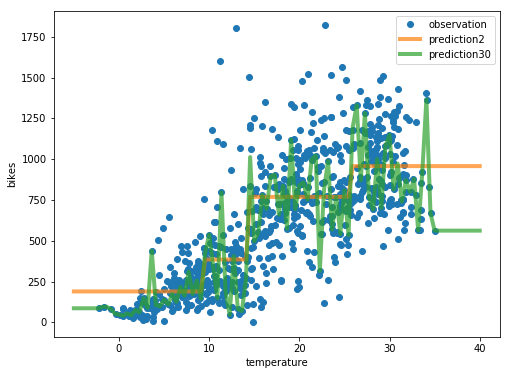

In [23]:
xx = np.array([np.linspace(-5, 40, 100)]).T

plt.figure(figsize=(8,6))
plt.plot(bikes['temperature'], bikes['count'], 'o', label='observation')
plt.plot(xx, regressor.predict(xx), linewidth=4, alpha=.7, label='prediction2')
plt.plot(xx, regressorSA.predict(xx), linewidth=4, alpha=.7, label='prediction30')
plt.xlabel('temperature')
plt.ylabel('bikes')
plt.legend()
plt.show()

In [24]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.metrics import *


print "MSE 2 depth %.3f"% mean_squared_error(bikes['count'], regressor.predict(np.array([bikes['temperature']]).T))
print "MSE 30 depth %.3f"% mean_squared_error(bikes['count'], regressorSA.predict(np.array([bikes['temperature']]).T))



MSE 2 depth 62803.790
MSE 30 depth 11534.118


In [25]:
s = cross_val_score(regressor, np.array([bikes['temperature']]).T, bikes['count'], cv=KFold(10, shuffle=True), scoring=make_scorer(mean_squared_error))
print "MSE depth: 2 %.3f (+/- %.5f)"%(np.mean(s), np.std(s))

s = cross_val_score(regressorSA, np.array([bikes['temperature']]).T, bikes['count'], cv=KFold(10, shuffle=True), scoring=make_scorer(mean_squared_error))
print "MSE depth: 30 %.3f (+/- %.5f)"%(np.mean(s), np.std(s))

MSE depth: 2 69110.964 (+/- 15211.17059)
MSE depth: 30 115995.507 (+/- 21072.60439)


In [9]:
from sklearn.tree import export_graphviz
export_graphviz(regressor, out_file='tree.dot', feature_names=['temperature'])

In [10]:
!dot -Tpng tree.dot > tree2.png # to convert the tree in a png image

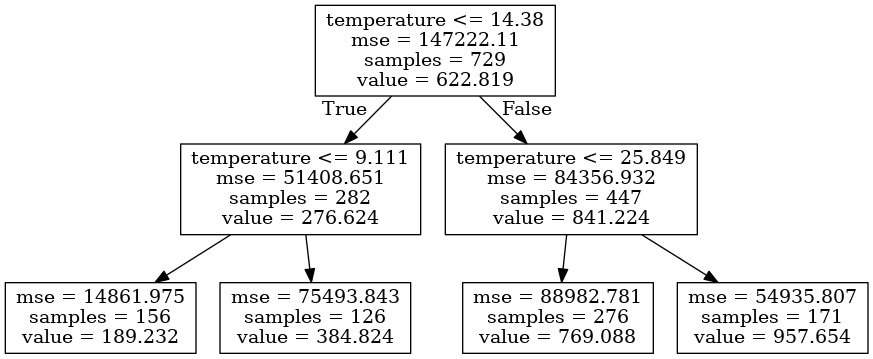

In [11]:
from IPython.display import Image
Image(filename='tree2.png') 

# Reference

[1] https://cambridgespark.com/content/tutorials/getting-started-with-regression-and-decision-trees/index.html

[2] Data: 